**Membaca file csv**

Import pandas. Assign dataset ke dalam variabel kemudian dilakukan pemfilteran agar value pada kolom price tidak berupa NaN, melainkan berupa float.

In [ ]:
import pandas as pd

data = pd.read_csv("winemag-data-130k-v2.csv")
wine_review = data[pd.notnull(data['price'])]
points = data['points']
price = wine_review['price']
wine_review

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


**Menghitung nilai rata-rata dan standar deviasi dari kolom points dan price**


Perhitungan dilakukan menggunakan fungsi yang digunakan pada penugasan yang sudah pernah dikerjakan.

In [ ]:
import math

def mean(x):
  avg = sum(x)/len(x)
  return avg

def number_of_data(x):
  num = len(x)
  return num

def stdev(x):
  result = (sum((x - mean(x)) ** 2)) / number_of_data(x)
  std = math.sqrt(result)
  return std

print("Rata-rata points adalah", mean(points))
print("Rata-rata price adalah", mean(price))
print("Standard deviasi points adalah", stdev(points))
print("Standard deviasi price adalah", stdev(price))

Rata-rata points adalah 88.44713820775404
Rata-rata price adalah 35.363389129985535
Standard deviasi points adalah 3.0397185090150947
Standard deviasi price adalah 41.022048119411714


**Menampilkan *distribution plot* untuk kolom points dan price**

Import library seaborn dan matplotlib. Lalu menambahkan garis vertikal sepanjang sumbu-y untuk menandakan rata-rata, rata-rata + standar deviasi, dan rata-rata - standar deviasi.

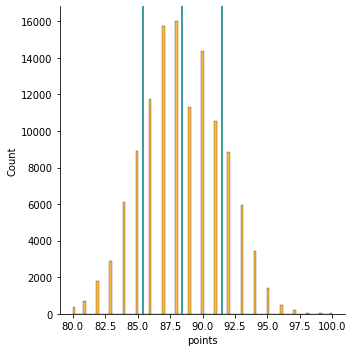

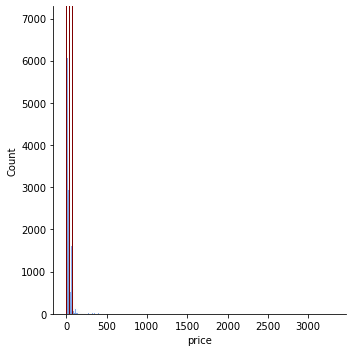

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(wine_review['points'], color='orange')
plt.axvline(x=mean(wine_review['points']), color='teal')
plt.axvline(x=mean(wine_review['points']) + stdev(wine_review['points']), color='teal')
plt.axvline(x=mean(wine_review['points']) - stdev(wine_review['points']), color='teal')

sns.displot(wine_review['price'], color='cornflowerblue')
plt.axvline(x=mean(wine_review['price']), linewidth=1, color='maroon')
plt.axvline(x=mean(wine_review['price']) + stdev(wine_review['price']), linewidth=1, color='maroon')
plt.axvline(x=mean(wine_review['price']) - stdev(wine_review['price']), linewidth=1, color='maroon')

**Menampilkan tiga negara dengan jumlah kontribusi wine terbesar**

Didapatkan hasil bahwa kontribusi terbesar berasal dari US, kedua dari France, dan ketiga dari Italy. 

In [ ]:
top_3 = wine_review.groupby('country').size().sort_values(ascending=False).head(3)
top_3

country
US        54265
France    17776
Italy     16914
dtype: int64

**Pemfilteran dataset oleh 3 negara dengan kontribusi wine terbesar dan points > 96**

Dilakukan menggunakan hukum logika AND dan OR.

In [ ]:
wine_review_filtered = wine_review[(
    (wine_review['country'] == "US") |
    (wine_review['country'] == "France") |
    (wine_review['country'] == "Italy")) &
    (wine_review['points'] > 96)]

wine_review_filtered

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
350,350,Italy,"After a few minutes in the glass, this stunnin...",Vignolo Riserva,97,150.0,Piedmont,Barolo,NaN,Kerin O’Keefe,@kerinokeefe,Cavallotto 2010 Vignolo Riserva (Barolo),Nebbiolo,Cavallotto
1556,1556,US,The flagship wine from Quilceda Creek offers e...,NaN,99,125.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek
1557,1557,US,"A stupendous Pinot Noir, showing how beautiful...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,Sonoma,NaN,NaN,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir,Williams Selyem
1558,1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux
1559,1559,France,"A beautiful wine, with the firmest tannins sur...",NaN,98,380.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Palmer 2009 Margaux,Bordeaux-style Red Blend,Château Palmer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128265,128265,US,"This is nearly perfect, a massive, monumental ...",Reserve,99,100.0,California,Oak Knoll District,Napa,NaN,NaN,Trefethen 2005 Reserve Cabernet Sauvignon (Oak...,Cabernet Sauvignon,Trefethen
128267,128267,US,An extraordinary wine. It's the essence of Rus...,Gold Ridge,97,85.0,California,Russian River Valley,Sonoma,NaN,NaN,Semper 2007 Gold Ridge Pinot Noir (Russian Riv...,Pinot Noir,Semper
128268,128268,US,A monumental Cabernet that succeeds on every l...,Estate,97,50.0,California,Oak Knoll District,Napa,NaN,NaN,Trefethen 2005 Estate Cabernet Sauvignon (Oak ...,Cabernet Sauvignon,Trefethen
128269,128269,US,"Massive, dramatic, beautiful, intense, but you...",NaN,97,100.0,California,Napa Valley,Napa,NaN,NaN,Hestan 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Hestan


**Menampilkan *scatter plot* dari hasil filter sebelumnya**

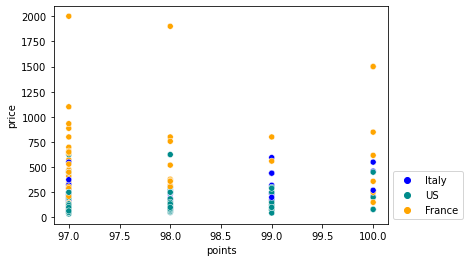

In [ ]:
sns.scatterplot(x='points', y='price', hue='country', palette=['b', 'darkcyan', 'orange'], data=wine_review_filtered)
plt.legend(bbox_to_anchor=(1., 0.), loc=3)

**Analisa kekurangan *scatter plot***

Kekurangan menggunakan *scatter plot* yaitu bahwa plotnya saling tumpang tindih (*overlap*) sehingga tidak bisa terlihat dengan jelas. *Scatter plot* memberikan visualisasi data yang lebih baik jika dataset nya relatif kecil. 

Contoh pada points = 97.0, semua points memiliki price yang tidak jauh berbeda (atau bahkan sama) sehingga jarak antar plotnya sangat berdekatan. Atau bisa dikatakan bahwa persebaran plot berdasarkan price sangat berdekatan.

Oleh karena itu, *scatter plot*, yang seharusnya terlihat seperti titik, tidak terlihat seperti kumpulan titik, melainkan terlihat seperti 1 garis vertikal yang berbeda warna.

Jika diminta untuk menentukan range rata-rata untuk price pada points = 97.0, maka tidak akan bisa dilihat dengan jelas oleh indra penglihatan. Apabila *scatter plot* ini bisa di *zoom in*, maka hasil persebaran price untuk plotnya bisa terlihat lebih jelas.


**Menampilkan *swarm plot* dari hasil filter yang sebelumnya**

Pada *swarm plot* dilakukan pemisahan (dengan split=True) berdasarkan country agar persebaran titik plot bisa terlihat lebih jelas. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2989: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use

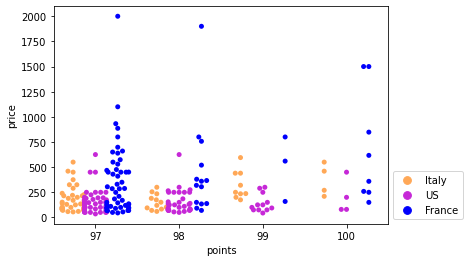

In [ ]:
sns.swarmplot(x='points', y='price', hue='country', palette='gnuplot2_r', split=True, data=wine_review_filtered)
plt.legend(bbox_to_anchor=(1., 0.), loc=3)

**Analisa negara dengan kualitas *wine* terbaik dan dan harga termurah**

Melihat hasil *swarm plot*, saya mengambil kesimpulan bahwa negara US (pink) merupakan negara yang menghasilkan kualitas wine terbaik dengan harga termurah. Untuk *swarm plot* di atas sudah dilakukan pemfilteran points > 96, maka dapat dikatakan dataset yang digunakan adalah dataset dengan kualitas wine terbaik karena range points nya berada di antara 97 dan 100. 

Maka kita hanya perlu melihat dari segi harga. Kesimpulan wine harga termurah dapat ditarik dengan melihat negara mana yang mayoritas plotnya mendekati nilai price = 0 atau price kecil. Berikut akan saya berikan penjabaran singkat mengenai harga wine tiap negara. 

**Italy (kuning):** Mayoritas plot berada pada points 97, 98, dan 99. Mayoritas range harganya berada di bawah 250. Terdapat lebih dari 10 wine yang range harganya di atas 250.

**US (pink):** Mayoritas plot berada pada points 97, 98, dan 99.  Mayoritas range harganya berada di bawah 250. Terdapat sekitar 5 wine yang range harganya di atas 250. 

**France (ungu):** Mayoritas plot berada pada points 97 dan 98. Mayoritas range harganya berada di bawah 750. Terdapat lebih dari 10 wine yang range harganya di atas 750. Terdapat sekitar 5 wine yang range harganya berada di antara 1000 dan 2000. Maksimum price senilai 2000. 

Dapat dikatakan bahwa France memiliki range harga yang terbesar (standar deviasi besar) maka dari itu negara France terliminasi dari negara dengan kualitas wine terbaik DAN harga termurah.

Kini tersisa negara Italy dan US. Dapat dilihat bahwa antara kedua negara ini, *wine* dari negara US jumlahnya lebih banyak dan posisi plotnya lebih mendekati price=0 dibandingkan posisi plot wine negara Italy. Mendekati garis price=0 disini berarti price semakin kecil. Price semakin kecil berarti harga semakin murah. 

Maka, dapat disimpulkan bahwa berdasarkan gambar *swarm plot*, negara US merupakan negara dengan kualitas wine paling baik dan harga paling murah. 

Lalu, akan dibuktikan juga dengan menampilkan jumlah data, rata-rata, standar deviasi, persebaran nilai kuartil (bawah, tengah, dan atas), nilai minimum price, dan nilai maksimum price.

**Pemfilteran masing-masing negara Italy, US, France dengan points >96**

Ini dilakukan untuk menampilkan dataset yang sudah difilter untuk dilakukan perbandingan dan membuktikan bahwa negara US merupakan negara yang menghasilkan kualitas wine terbaik dengan harga termurah.

In [ ]:
wine_review_Italy = wine_review[
    (wine_review['country'] == "Italy") &
    (wine_review['points'] > 96)]
    
wine_review_US = wine_review_filtered[
    (wine_review['country'] == "US") &
    (wine_review['points'] > 96)]

wine_review_France = wine_review[
    (wine_review['country'] == "France") &
    (wine_review['points'] > 96)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
wine_review_Italy.describe()

,Unnamed: 0,points,price
count,67.000000,67.000000,67.000000
mean,66127.358209,97.626866,199.044776
std,41851.509520,0.934780,135.317184
min,350.000000,97.000000,55.000000
25%,35518.000000,97.000000,95.500000
50%,54299.000000,97.000000,170.000000
75%,109408.500000,98.000000,245.000000
max,122937.000000,100.000000,595.000000


In [ ]:
wine_review_US.describe()

,Unnamed: 0,points,price
count,130.000000,130.000000,130.000000
mean,79650.523077,97.530769,135.815385
std,40191.043424,0.789352,102.075043
min,1556.000000,97.000000,35.000000
25%,45799.250000,97.000000,75.000000
50%,83462.500000,97.000000,100.000000
75%,117141.750000,98.000000,150.000000
max,128270.000000,100.000000,625.000000


In [ ]:
wine_review_France.describe()

,Unnamed: 0,points,price
count,75.000000,75.000000,75.000000
mean,66515.720000,97.586667,419.506667
std,39281.307282,0.987672,405.211302
min,1558.000000,97.000000,45.000000
25%,36531.000000,97.000000,132.000000
50%,58352.000000,97.000000,305.000000
75%,100001.500000,98.000000,555.000000
max,122948.000000,100.000000,2000.000000


**Lanjutan analisa negara dengan kualitas wine terbaik dan harga termurah**

Dapat dilihat dari data-data tiga negara di atas bahwa negara US memiliki nilai yang terkecil dibanding negara Italy dan France, kecuali di bagian count.

Count disini berarti jumlah wine yang diproduksi. Sudah ditampilkan juga sebelumnya bahwa US merupakan negara penghasil wine terbesar di dataset ini. Membuktikan bahwa mayoritas wine dari US tergolong murah. 

Dengan nilai rata-rata dan standar deviasi yang kecil, persebaran harga wine dari US sangat dekat dan membuktikan bahwa di *swarm plot* terdapat banyak plot yang sangat berdekatan di area price < 250. 

Lalu, dapat dilihat juga bahwa harga maksimum negara US merupakan yang terkecil di antara ketiga negara tersebut. 

Oleh karena itu, terbukti bahwa US memang negara yang menghaislkan kualitas wine terbaik dengan harga termurah.

**Menampilkan *scatter plot* untuk variety wine dari negara US**

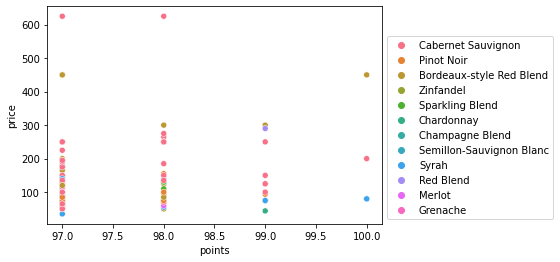

In [ ]:
sns.scatterplot(x='points', y='price', hue='variety', data=wine_review_US)
plt.legend(bbox_to_anchor=(1., 0.), loc=3)

**Menampilkan *swamp plot* untuk variety wine dari negara US**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


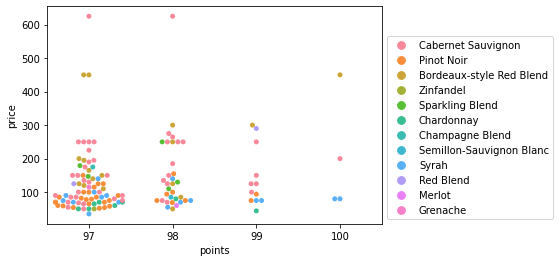

In [ ]:
sns.swarmplot(x='points', y='price', hue='variety', data=wine_review_US)
plt.legend(bbox_to_anchor=(1., 0.), loc=3)

**Analisa varietas wine dari US yang memiliki kualitas terbaik dan harga termurah**

Melihat hasil *swarm plot*, saya mengambil kesimpulan bahwa varietas Syrah merupakan varietas dari US yang menghasilkan wine kualitas terbaik dengan harga termurah. Untuk *swarm plot* di atas sudah dilakukan pemfilteran points > 96, maka dapat dikatakan dataset yang digunakan adalah dataset dengan kualitas wine terbaik karena range points nya berada di antara 97 dan 100. 

Maka kita hanya perlu melihat dari segi harga. Kesimpulan varietas wine harga termurah dapat ditarik dengan melihat plot varietas mana yang mayoritas plotnya mendekati nilai price = 0 atau price kecil.

Dapat dilihat bahwa di antara keseluruhan varietas yang ada, posisi plot varietas Syrah lebih mendekati garis price=0 dibandingkan posisi plot varietas lainnya. Mendekati garis price=0 disini berarti price semakin kecil. Price semakin kecil berarti harga semakin murah. Selain itu, persebaran range harga nya tidak terlalu besar (standar deviasi cenderung kecil) karena nilai maksimum price < 200. Nilai rata-rata dari varietas ini juga merupakan yang terkecil.

Maka, dapat disimpulkan bahwa berdasarkan gambar *swarm plot*, varietas Syrah dari US merupakan varietas wine dengan kualitas paling baik dan harga paling murah. 